**Loading Of Dataset**

In [127]:
#Importing essential libraries

import pandas as pd
import numpy as np
import string
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


In [1]:
#Loading Data

data = pd.read_csv('/content/drive/MyDrive/Dissertation/synthetic_updated_data.csv')

NameError: ignored

In [129]:
data.head(10)

,Destination,Duration(days),Travelerage,Travelergender,Travelernationality,Accommodationtype,Accommodationcost,Transportationtype,Transportationcost
0,"London, UK",7,35.0,Male,American,Hotel,1200,Flight,600
1,"Phuket, Thailand",5,28.0,Female,Canadian,Resort,800,Flight,500
2,"Bali, Indonesia",7,45.0,Male,Korean,Villa,1000,Flight,700
3,"New York, USA",14,29.0,Female,British,Hotel,2000,Flight,1000
4,"Tokyo, Japan",7,26.0,Female,Vietnamese,Airbnb,700,Train,200
5,"Paris, France",5,42.0,Male,American,Hotel,1500,Flight,800
6,"Sydney, Australia",10,33.0,Female,Australian,Hostel,500,Flight,1200
7,"Rio de Janeiro, Brazil",7,25.0,Male,Brazilian,Airbnb,900,Flight,600
8,"Amsterdam, Netherlands",7,31.0,Female,Dutch,Hotel,1200,Train,200
9,"Dubai, United Arab Emirates",7,39.0,Male,Emirati,Resort,2500,Flight,800


In [130]:
#Making copy for dataset for future use
duplicate_data = pd.read_csv('/content/drive/MyDrive/Dissertation/synthetic_updated_data.csv')

**Data Preprocessing**

In [2]:
#Adding TransportationCost and Accommodationcost to one column (Budget)
#Dropping Accommodationcost and Transporationcost columns as well as we do not need them anymore

data['Budget'] = data['Transportationcost'] + data['Accommodationcost']
data = data.drop(['Accommodationcost', 'Transportationcost'], axis=1)

NameError: ignored

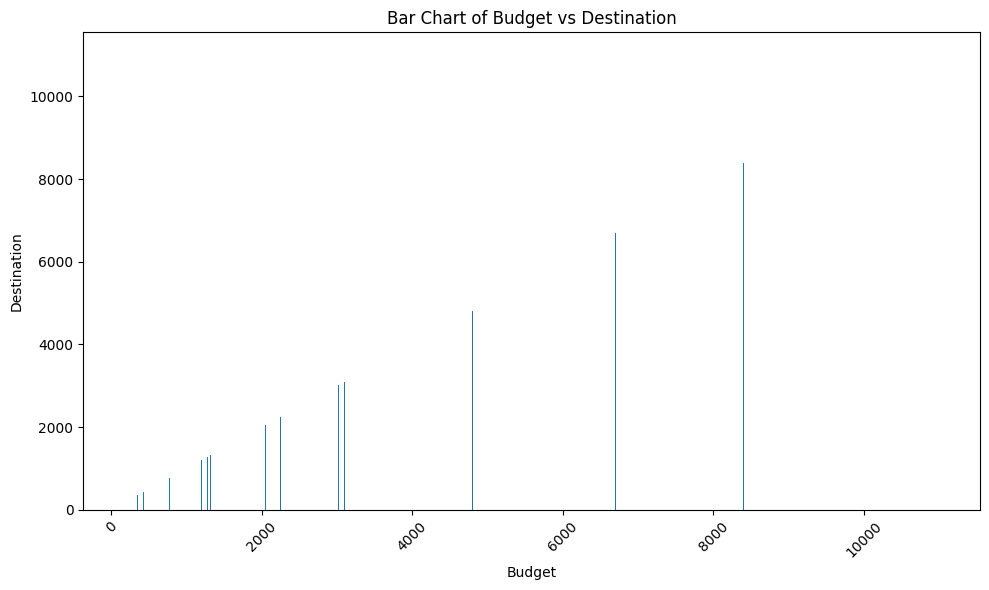

In [111]:
# List of feature column names (excluding 'Destination')
feature_columns = ['Budget']

# Plot each feature column against the target 'Destination'
for column in feature_columns:
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    plt.bar(data[column], data['Budget'])
    plt.xlabel(column)
    plt.ylabel('Destination')
    plt.title(f'Bar Chart of {column} vs Destination')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [132]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the 'values' column
data['Budget'] = scaler.fit_transform(data[['Budget']])

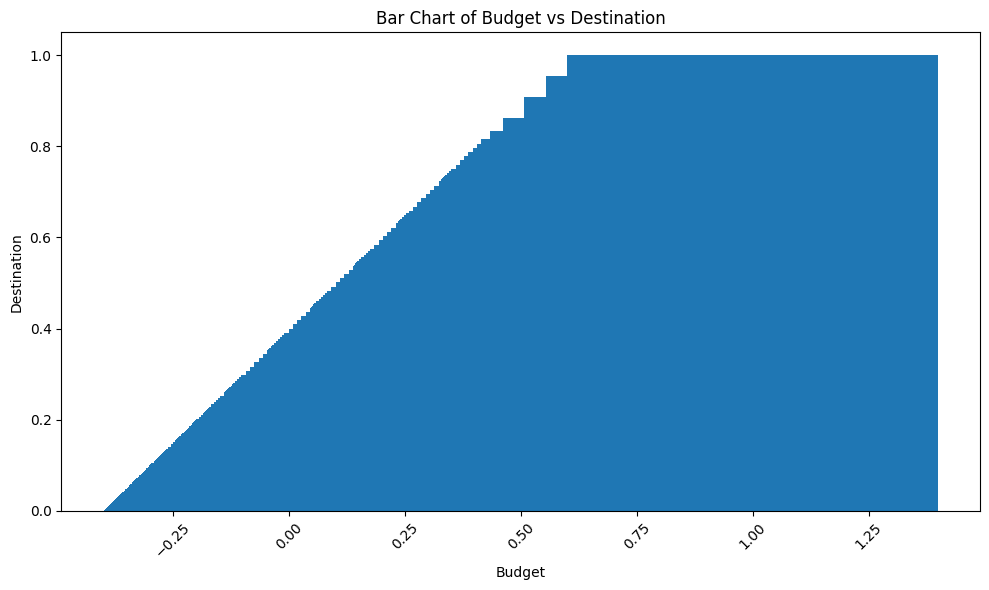

In [41]:
# List of feature column names (excluding 'Destination')
feature_columns = ['Budget']

# Plot each feature column against the target 'Destination'
for column in feature_columns:
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    plt.bar(data[column], data['Budget'])
    plt.xlabel(column)
    plt.ylabel('Destination')
    plt.title(f'Bar Chart of {column} vs Destination')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [133]:
#To save min max value to calculate normalization in future
duplicate_data['Budget'] = duplicate_data['Transportationcost'] + duplicate_data['Accommodationcost']
duplicate_data = duplicate_data.drop(['Accommodationcost', 'Transportationcost'], axis=1)

In [134]:
data['Travelernationality'].nunique()

41

In [135]:
data.head(10)

,Destination,Duration(days),Travelerage,Travelergender,Travelernationality,Accommodationtype,Transportationtype,Budget
0,"London, UK",7,35.0,Male,American,Hotel,Flight,0.150508
1,"Phuket, Thailand",5,28.0,Female,Canadian,Resort,Flight,0.104340
2,"Bali, Indonesia",7,45.0,Male,Korean,Villa,Flight,0.141274
3,"New York, USA",14,29.0,Female,British,Hotel,Flight,0.261311
4,"Tokyo, Japan",7,26.0,Female,Vietnamese,Airbnb,Train,0.067405
5,"Paris, France",5,42.0,Male,American,Hotel,Flight,0.196676
6,"Sydney, Australia",10,33.0,Female,Australian,Hostel,Flight,0.141274
7,"Rio de Janeiro, Brazil",7,25.0,Male,Brazilian,Airbnb,Flight,0.122807
8,"Amsterdam, Netherlands",7,31.0,Female,Dutch,Hotel,Train,0.113573
9,"Dubai, United Arab Emirates",7,39.0,Male,Emirati,Resort,Flight,0.289012


In [136]:
data['Accommodationtype'].nunique()

8

In [137]:
data[['Duration(days)']].nunique()

Duration(days)    12
dtype: int64

In [138]:
data = data.drop(['Travelerage','Duration(days)'], axis=1)


In [139]:
data.dtypes

Destination             object
Travelergender          object
Travelernationality     object
Accommodationtype       object
Transportationtype      object
Budget                 float64
dtype: object

In [140]:
data.head(5)

,Destination,Travelergender,Travelernationality,Accommodationtype,Transportationtype,Budget
0,"London, UK",Male,American,Hotel,Flight,0.150508
1,"Phuket, Thailand",Female,Canadian,Resort,Flight,0.104340
2,"Bali, Indonesia",Male,Korean,Villa,Flight,0.141274
3,"New York, USA",Female,British,Hotel,Flight,0.261311
4,"Tokyo, Japan",Female,Vietnamese,Airbnb,Train,0.067405


In [141]:
#Removing any duplicate columns

data.drop_duplicates(subset=data.columns[:-1], keep='first')

,Destination,Travelergender,Travelernationality,Accommodationtype,Transportationtype,Budget
0,"London, UK",Male,American,Hotel,Flight,0.150508
1,"Phuket, Thailand",Female,Canadian,Resort,Flight,0.104340
2,"Bali, Indonesia",Male,Korean,Villa,Flight,0.141274
3,"New York, USA",Female,British,Hotel,Flight,0.261311
4,"Tokyo, Japan",Female,Vietnamese,Airbnb,Train,0.067405
...,...,...,...,...,...,...
15123,Brazil,Female,French,Hotel,Plane,0.132041
15126,London,Male,Canadian,Hotel,Train,0.113573
15133,"Sydney, Aus",Male,British,Hostel,Plane,0.159741
15134,"Paris, France",Male,Singapore,Hotel,Plane,0.074792


In [142]:
#Let's make our data more simple
#It does not make any to have flight and Airplane as both values in a column, so replaced them with single Plane value
data["Transportationtype"].replace({"Flight":"Plane", "Airplane": "Plane"}, inplace=True)

In [143]:
duplicate_data["Transportationtype"].replace({"Flight":"Plane", "Airplane": "Plane"}, inplace=True)

In [144]:
data["Transportationtype"].unique()


array(['Plane', 'Train', 'Bus', 'Car rental', 'Subway', 'Car', 'Ferry'],
      dtype=object)

In [145]:
data.head(10)

,Destination,Travelergender,Travelernationality,Accommodationtype,Transportationtype,Budget
0,"London, UK",Male,American,Hotel,Plane,0.150508
1,"Phuket, Thailand",Female,Canadian,Resort,Plane,0.104340
2,"Bali, Indonesia",Male,Korean,Villa,Plane,0.141274
3,"New York, USA",Female,British,Hotel,Plane,0.261311
4,"Tokyo, Japan",Female,Vietnamese,Airbnb,Train,0.067405
5,"Paris, France",Male,American,Hotel,Plane,0.196676
6,"Sydney, Australia",Female,Australian,Hostel,Plane,0.141274
7,"Rio de Janeiro, Brazil",Male,Brazilian,Airbnb,Plane,0.122807
8,"Amsterdam, Netherlands",Female,Dutch,Hotel,Train,0.113573
9,"Dubai, United Arab Emirates",Male,Emirati,Resort,Plane,0.289012


In [146]:
#Applying Label Encoding

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

data['Travelernationality']= label_encoder.fit_transform(data['Travelernationality'])
data['Transportationtype']= label_encoder.fit_transform(data['Transportationtype'])
data['Accommodationtype']= label_encoder.fit_transform(data['Accommodationtype'])
data['Travelergender']= label_encoder.fit_transform(data['Travelergender'])

In [147]:
data.dtypes

Destination             object
Travelergender           int64
Travelernationality      int64
Accommodationtype        int64
Transportationtype       int64
Budget                 float64
dtype: object

In [148]:
data.head(10)

,Destination,Travelergender,Travelernationality,Accommodationtype,Transportationtype,Budget
0,"London, UK",1,0,3,4,0.150508
1,"Phuket, Thailand",0,7,4,4,0.104340
2,"Bali, Indonesia",1,23,7,4,0.141274
3,"New York, USA",0,4,3,4,0.261311
4,"Tokyo, Japan",0,40,0,6,0.067405
5,"Paris, France",1,0,3,4,0.196676
6,"Sydney, Australia",0,1,2,4,0.141274
7,"Rio de Janeiro, Brazil",1,3,0,4,0.122807
8,"Amsterdam, Netherlands",0,10,3,6,0.113573
9,"Dubai, United Arab Emirates",1,11,4,4,0.289012


In [24]:
#Finding correlation between variables.

#correlation = data['Travelerage'].corr(data['Transportationtype'])
#print("Correlation between variable1 and variable2:", correlation)

In [149]:
#Getting min and max value of budget column to calculate normalisation for user input

min_of_budget = duplicate_data['Budget'].min()
max_of_budget = duplicate_data['Budget'].max()

**Preprocessing of Sample User Input**

In [150]:
# User's input (replace these values with user's input)
user_gender = 'Male'
user_nationality = 'Canadian'
user_accommodation = 'Hotel'
user_transportation = 'Plane'
user_budget = 1800
#user_duration_of_vacation = 7
#user_age = 35

In [151]:
#Create a DataFrame containing the user's input
user_input = pd.DataFrame({
    'Travelergender': [user_gender],
    'Travelernationality': [user_nationality],
    'Accommodationtype': [user_accommodation],
    'Transportationtype': [user_transportation],
    'Budget': [user_budget],
    #'Duration(days)': [user_duration_of_vacation],
    #'Travelerage': [user_age]
})

**Preprocessing User Input**

In [152]:
user_input

,Travelergender,Travelernationality,Accommodationtype,Transportationtype,Budget
0,Male,Canadian,Hotel,Plane,1800


In [153]:
# Map label encoded values for nationality
nationality_mapping = {'American': 0, 'Canadian': 7, 'Korean': 23, 'British': 4, 'Vietnamese': 40, 'Australian': 1, 'Brazilian': 3, 'Dutch': 10, 'Emirati': 11, 'Mexican': 24, 'Spanish': 33, 'Chinese': 9, 'German': 13, 'Moroccan': 25, 'Scottish': 27, 'Japanese': 22, 'Italian': 19, 'Indian': 17, 'South Korean': 31, 'French': 12, 'South African': 29, 'Taiwanese': 35, 'Indonesian': 18, 'USA': 37, 'Canada': 6, 'South Korea': 30, 'UK': 36, 'China': 8, 'Taiwan': 34, 'Japan': 21, 'Spain': 32, 'Brazil': 2, 'Germany': 14, 'Hong Kong': 16, 'United Kingdom': 39, 'Singapore': 28, 'Italy': 20, 'Greece': 15, 'United Arab Emirates': 38, 'Cambodia': 5, 'New Zealander': 26}
print(nationality_mapping)

{'American': 0, 'Canadian': 7, 'Korean': 23, 'British': 4, 'Vietnamese': 40, 'Australian': 1, 'Brazilian': 3, 'Dutch': 10, 'Emirati': 11, 'Mexican': 24, 'Spanish': 33, 'Chinese': 9, 'German': 13, 'Moroccan': 25, 'Scottish': 27, 'Japanese': 22, 'Italian': 19, 'Indian': 17, 'South Korean': 31, 'French': 12, 'South African': 29, 'Taiwanese': 35, 'Indonesian': 18, 'USA': 37, 'Canada': 6, 'South Korea': 30, 'UK': 36, 'China': 8, 'Taiwan': 34, 'Japan': 21, 'Spain': 32, 'Brazil': 2, 'Germany': 14, 'Hong Kong': 16, 'United Kingdom': 39, 'Singapore': 28, 'Italy': 20, 'Greece': 15, 'United Arab Emirates': 38, 'Cambodia': 5, 'New Zealander': 26}


In [154]:
user_input['Travelernationality'] = user_input['Travelernationality'].map(nationality_mapping)

In [155]:
accommodationType_mapping = {'Airbnb': 0, 'Guesthouse': 1, 'Hostel': 2, 'Hotel': 3, 'Resort': 4, 'Riad': 5, 'Vacation rental': 6, 'Villa': 7}

user_input['Accommodationtype'] = user_input['Accommodationtype'].map(accommodationType_mapping)

In [156]:
user_input['Accommodationtype']

0    3
Name: Accommodationtype, dtype: int64

In [157]:
transporationType_mapping = {'Bus': 0, 'Car': 1, 'Car rental': 2, 'Ferry': 3, 'Plane': 4, 'Subway': 5, 'Train': 6}

user_input['Transportationtype'] = user_input['Transportationtype'].map(transporationType_mapping)

In [158]:
gender_mapping = {'Female': 0, 'Male': 1}

user_input['Travelergender'] = user_input['Travelergender'].map(gender_mapping)

In [159]:
le = preprocessing.LabelEncoder()
le.fit(duplicate_data['Accommodationtype'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Airbnb': 0, 'Guesthouse': 1, 'Hostel': 2, 'Hotel': 3, 'Resort': 4, 'Riad': 5, 'Vacation rental': 6, 'Villa': 7}


In [160]:
#Calculating min max scalar for column budget in user input


# Original 'Budget' values in user_input data
original_budgets = user_input['Budget']  # Replace with your actual 'Budget' values


# Calculate min-max scaled values
value = [(x - min_of_budget) / (max_of_budget - min_of_budget) for x in original_budgets]

user_input['Budget'] = value

In [161]:
user_input

,Travelergender,Travelernationality,Accommodationtype,Transportationtype,Budget
0,1,7,3,4,0.150508


In [162]:
user_input.dtypes

Travelergender           int64
Travelernationality      int64
Accommodationtype        int64
Transportationtype       int64
Budget                 float64
dtype: object

In [163]:
user_vector = user_input.values

In [164]:
print(user_vector)

[[1.         7.         3.         4.         0.15050785]]


**Calculating cosine Similarity**

In [165]:
# Calculate cosine similarity with all destinations
cosine_scores = cosine_similarity(user_vector, data.drop(columns=['Destination']))

In [166]:
cosine_scores.max()

0.9999999999999999

In [167]:
# Find the most similar destination
most_similar_index = np.argmax(cosine_scores)
recommended_destination = data['Destination'].iloc[most_similar_index]

print("Recommended Destination:", recommended_destination)

Recommended Destination: Bangkok, Thai


In [168]:
user_input

,Travelergender,Travelernationality,Accommodationtype,Transportationtype,Budget
0,1,7,3,4,0.150508


**Calculating Euclidean Distance**

In [169]:
# Calculate Euclidean distances
euclidean_scores = euclidean_distances(user_input, data.drop(columns=['Destination']))


In [170]:
euclidean_scores.max()

33.496314265067404

**Finding top 5 destinations using cosine similarity**

In [171]:
# Find the most similar destination
most_similar_index = np.argmax(euclidean_scores)
recommended_destination = data['Destination'].iloc[most_similar_index]

print("Recommended Destination:", recommended_destination)

Recommended Destination: Rome, Italy


In [172]:
# Get indices of top 5 most similar destinations
top_indices = np.argsort(cosine_scores[0])[::-1][:5]

# Get the corresponding destination names
top_destinations = data['Destination'].iloc[top_indices]

# Print the top 5 recommended destinations
print("Top 5 Recommended Destinations:")
for rank, destination in enumerate(top_destinations, start=1):
    print(f"{rank}. {destination}")

Top 5 Recommended Destinations:
1. Bangkok
2. London
3. Bangkok, Thai
4. Paris, France
5. Phuket


In [51]:
# Get indices of historical users with top similarity scores
top_indices = np.argsort(cosine_scores[0])[::-1][:5]

In [ ]:
top_indices

array([ 6281,  4271,  6310,  9334, 10769])

In [ ]:
data.iloc[4271]

Destination                Bali
Travelerage                26.0
Travelergender                0
Travelernationality          25
Accommodationtype             7
Transportationtype            4
Budget                 0.630656
Name: 4271, dtype: object

In [ ]:
# Get actual visited destinations for the top historical users
top_actual_destinations = data['Destination'].iloc[top_indices].tolist()

In [ ]:
top_actual_destinations

['Athens, Greece', 'Bali', 'Sydney', 'Rome, Italy', 'Bali']

In [173]:
# Split data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [174]:
test_data

,Destination,Travelergender,Travelernationality,Accommodationtype,Transportationtype,Budget
566,Bali,0,0,2,4,0.132041
10239,Rio de Janeiro,0,0,3,6,0.159741
2085,New York,0,0,3,6,0.058172
11187,Bangkok,1,1,3,1,0.085873
9129,"Bangkok, Thailand",1,25,2,4,0.021237
...,...,...,...,...,...,...
4355,Dubai,1,23,2,4,0.233610
6270,Santorini,0,4,7,4,0.168975
7990,"Sydney, Aus",1,4,4,6,0.279778
2984,Phuket,1,40,3,6,0.076639


**Testing of Similarity Metrics**

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Get the user input vectors for test data
user_inputs_test = test_data.drop(columns=['Destination'])

# Initialize an empty list to store accuracy values
accuracies = []

# Iterate over each test user's input
for i in range(len(user_inputs_test)):
    # Get the user input for the current test user
    test_user_input = user_inputs_test.iloc[[i]]

    user_vector = test_user_input.values
    # Calculate cosine similarity with all destinations
    cosine_scores_test = cosine_similarity(test_user_input, train_data.drop(columns=['Destination']))

    print('cosine score :' , cosine_scores_test)
    # Get indices of top 5 most similar destinations
    top_indices_test = np.argsort(cosine_scores_test[0])[::-1][:5]

    # Get the corresponding destination names
    top_destinations_test = data['Destination'].iloc[top_indices_test]

    # Get the actual destination visited by the test user
    actual_destination = test_data['Destination'].iloc[i]

    # Calculate accuracy for the current test user
    accuracy = 1 if actual_destination in top_destinations_test.values else 0

    # Append accuracy to the list
    accuracies.append(accuracy)

# Calculate the overall accuracy
overall_accuracy = sum(accuracies) / len(accuracies)

# Print the overall accuracy
print("Overall Accuracy:", overall_accuracy)


cosine score : [[0.22543226 0.17542603 0.99969499 ... 0.15667288 0.82798607 0.26248662]]
cosine score : [[0.22543416 0.17539258 0.99981968 ... 0.15666602 0.8280511  0.2625016 ]]
cosine score : [[0.22540364 0.1752762  0.99999257 ... 0.15662311 0.82809292 0.26249992]]
cosine score : [[0.42672491 0.35354499 0.64541088 ... 0.41348871 0.89081116 0.42354046]]
cosine score : [[0.99794992 0.99606078 0.17595576 ... 0.99936371 0.60707247 0.9945857 ]]
cosine score : [[0.99840604 0.98927494 0.28001531 ... 0.99111573 0.67626487 0.99913353]]
cosine score : [[0.22316116 0.18596707 0.98988279 ... 0.1510506  0.78074553 0.26517269]]
cosine score : [[0.96717747 0.97450907 0.36143092 ... 0.95172362 0.68586828 0.97820376]]
cosine score : [[0.22543416 0.17540941 0.99976365 ... 0.15666997 0.82802313 0.26249545]]
cosine score : [[0.9955319  0.99636006 0.13741339 ... 0.99755524 0.56363955 0.99181689]]
cosine score : [[0.81874513 0.82690917 0.62280078 ... 0.78126528 0.77899096 0.84650986]]
cosine score : [[0.21

In [176]:
from sklearn.metrics.pairwise import euclidean_distances

# Get the user input vectors for test data
user_inputs_test = test_data.drop(columns=['Destination'])

# Initialize an empty list to store accuracy values
accuracies = []

# Iterate over each test user's input
for i in range(len(user_inputs_test)):
    # Get the user input for the current test user
    test_user_input = user_inputs_test.iloc[[i]]

    # Calculate Euclidean distances with all destinations
    euclidean_distances_test = euclidean_distances(test_user_input, train_data.drop(columns=['Destination']))

    # Get indices of top 5 most similar destinations
    top_indices_test = np.argsort(euclidean_distances_test[0])[:5]

    # Get the corresponding destination names
    top_destinations_test = data['Destination'].iloc[top_indices_test]

    # Get the actual destination visited by the test user
    actual_destination = test_data['Destination'].iloc[i]

    # Calculate accuracy for the current test user
    accuracy = 1 if actual_destination in top_destinations_test.values else 0

    # Append accuracy to the list
    accuracies.append(accuracy)

# Calculate the overall accuracy
overall_accuracy = sum(accuracies) / len(accuracies)

# Print the overall accuracy
print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.130779392338177


In [66]:
from sklearn.metrics.pairwise import pairwise_distances

# Get the user input vectors for test data
user_inputs_test = test_data.drop(columns=['Destination'])

# Initialize an empty list to store accuracy values
accuracies = []

# Iterate over each test user's input
for i in range(len(user_inputs_test)):
    # Get the user input for the current test user
    test_user_input = user_inputs_test.iloc[[i]]

    # Calculate Pearson correlation distances with all destinations
    pearson_distances_test = pairwise_distances(test_user_input, train_data.drop(columns=['Destination']))

    # Get indices of top 5 most similar destinations
    top_indices_test = np.argsort(pearson_distances_test[0])[:5]

    # Get the corresponding destination names
    top_destinations_test = data['Destination'].iloc[top_indices_test].values

    # Get the actual destination visited by the test user
    actual_destination = test_data['Destination'].iloc[i]

    # Calculate accuracy for the current test user
    accuracy = 1 if actual_destination in top_destinations_test else 0

    # Append accuracy to the list
    accuracies.append(accuracy)

# Calculate the overall accuracy
overall_accuracy = sum(accuracies) / len(accuracies)

# Print the overall accuracy
print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.130779392338177


**Random Forest Algorithm**

In [21]:
# Assuming your dataset is in a Pandas DataFrame called 'data'
# 'VacationSpot' is the target variable column

# Extract the features (input variables) into X
X = data.drop(columns=['Destination'])

# Extract the target variable (output variable) into y
y = data['Destination']

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [96]:
features = data.drop(columns=['Destination'])  # Features are all columns except 'Destination'
labels = data['Destination']  # Labels are the 'Destination' column

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [93]:
rf_classifier = RandomForestClassifier(n_estimators=1, random_state=0, max_depth = 10)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1, random_state=0)

In [94]:
y_pred = rf_classifier.predict(X_test)


In [95]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.04128137384412153
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.02      0.02      0.02        54
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00        22
           5       0.04      0.17      0.07       156
           6       0.05      0.01      0.02        93
           7       0.04      0.03      0.04        88
           8       0.00      0.00      0.00        16
           9       0.03      0.02      0.03        88
          10       0.10      0.03      0.04        39
          11       0.07      0.07      0.07       100
          12       0.00      0.00      0.00        43
          13       0.00      0.00      0.00        38
          14       0.12      0.07      0.09        30
          15       0.00      0.00      0.00        92
          16       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Logistic Regression Algorithm**

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [103]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [104]:
logistic_reg = LogisticRegression(max_iter=1000, random_state=42)
logistic_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [105]:
y_pred = logistic_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.04854689564068692
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.00      0.00      0.00        54
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00        22
           5       0.05      0.63      0.10       156
           6       0.00      0.00      0.00        93
           7       0.00      0.00      0.00        88
           8       0.00      0.00      0.00        16
           9       0.00      0.00      0.00        88
          10       0.00      0.00      0.00        39
          11       0.00      0.00      0.00       100
          12       0.00      0.00      0.00        43
          13       0.00      0.00      0.00        38
          14       0.00      0.00      0.00        30
          15       0.00      0.00      0.00        92
          16       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
